In [ ]:
import pandas as pd
import numpy as np

# for class imbalance and predicting stroke
# subset the data to improve balance
# undersample major class?
# ~300 of stroke and ~300 of non-stroke
# change to one to five or one to four
# business case: public outcomes
# optimize cost of over predicting stoke vs catching all strokes
# over predict stroke

# smoking status
# random assignment
# smoke vs non-smoke
# remove unknown smoking status and compare?
# stroke 47/~200-300 unknown smoke status
# given if someone has a stroke -> what is the likely hood of each smoke status
# ignore likely hood of each smoke states if someone doesn't have a smoke

# visualizations
# split out decision tree model file


In [2]:
df = pd.read_csv('../data/raw/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df = df.drop(columns=['id'])

In [4]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df['bmi'] = imputer.fit_transform(df[['bmi']])

In [5]:
df['hypertension'] = df['hypertension'].map({0: 'No', 1: 'Yes'})
df['heart_disease'] = df['heart_disease'].map({0: 'No', 1: 'Yes'})

In [6]:
from sklearn.preprocessing import LabelEncoder


categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'hypertension', 'heart_disease']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
# subset the data to address class imbalance
# keep all stroke oberservation
# randomly select non-stroke oberservation so that the ratio is 1/5 (might need to adjust)


In [7]:
X = df.drop(columns=['stroke'])
y = df['stroke']

In [8]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# do you need to scale decision tree and xgboost?

Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

clf = DecisionTreeClassifier(class_weight="balanced", random_state=42)
clf.fit(X_train, y_train)

y_probs = clf.predict_proba(X_test)[:, 1]

threshold = 0.3
y_pred = (y_probs >= threshold).astype(int)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with threshold {threshold}: {accuracy}")

precision_0 = precision_score(y_test, y_pred, pos_label=0)
recall_0 = recall_score(y_test, y_pred, pos_label=0)
f1_0 = f1_score(y_test, y_pred, pos_label=0)

precision_1 = precision_score(y_test, y_pred, pos_label=1)
recall_1 = recall_score(y_test, y_pred, pos_label=1)
f1_1 = f1_score(y_test, y_pred, pos_label=1)

print(f"Precision for class 0: {precision_0 * 100:.2f}%")
print(f"Recall for class 0: {recall_0 * 100:.2f}%")
print(f"F1 Score for class 0: {f1_0 * 100:.2f}%")

print(f"Precision for class 1: {precision_1 * 100:.2f}%")
print(f"Recall for class 1: {recall_1 * 100:.2f}%")
print(f"F1 Score for class 1: {f1_1 * 100:.2f}%")


Accuracy with threshold 0.3: 0.9148727984344422
Precision for class 0: 95.38%
Recall for class 0: 95.68%
F1 Score for class 0: 95.53%
Precision for class 1: 10.64%
Recall for class 1: 10.00%
F1 Score for class 1: 10.31%


XGBoost

In [10]:
!pip install xgboost

In [22]:
from xgboost import XGBClassifier

scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
print(scale_pos_weight)

# With the availability of "conformal prediction" and advanced ML methods, synthetic oversampling is challenging to justify.
# smote was good
# compare box plot of each variable and stroke for numerical
# clustered bar chart for catergorical and stroke
# Shap?
# Classification: What demographic and health-related factors significantly predict the occurrence of a stroke in patients?
# regularization, cross validation, learning curves

clf = XGBClassifier(max_depth=5, random_state=42, scale_pos_weight=scale_pos_weight)
clf.fit(X_train, y_train)

y_probs = clf.predict_proba(X_test)[:, 1]

# overpredict strokes
threshold = 0.1
y_pred = (y_probs >= threshold).astype(int)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

precision_0 = precision_score(y_test, y_pred, pos_label=0)
recall_0 = recall_score(y_test, y_pred, pos_label=0)
f1_0 = f1_score(y_test, y_pred, pos_label=0)

precision_1 = precision_score(y_test, y_pred, pos_label=1)
recall_1 = recall_score(y_test, y_pred, pos_label=1)
f1_1 = f1_score(y_test, y_pred, pos_label=1)

print(f"Precision for class 0: {precision_0 * 100:.2f}%")
print(f"Recall for class 0: {recall_0 * 100:.2f}%")
print(f"F1 Score for class 0: {f1_0 * 100:.2f}%")

print(f"Precision for class 1: {precision_1 * 100:.2f}%")
print(f"Recall for class 1: {recall_1 * 100:.2f}%")
print(f"F1 Score for class 1: {f1_1 * 100:.2f}%")

19.542713567839197
Accuracy: 0.8111545988258317
Precision for class 0: 97.33%
Recall for class 0: 82.41%
F1 Score for class 0: 89.25%
Precision for class 1: 14.07%
Recall for class 1: 56.00%
F1 Score for class 1: 22.49%


In [12]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred_cv = cross_val_predict(clf, X, y, cv=5)

precision_0 = precision_score(y, y_pred_cv, pos_label=0)
recall_0 = recall_score(y, y_pred_cv, pos_label=0)
f1_0 = f1_score(y, y_pred_cv, pos_label=0)

precision_1 = precision_score(y, y_pred_cv, pos_label=1)
recall_1 = recall_score(y, y_pred_cv, pos_label=1)
f1_1 = f1_score(y, y_pred_cv, pos_label=1)

cv_scores = cross_val_score(clf, X, y, cv=5)
print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f}")

print(f"Precision for class 0: {precision_0 * 100:.2f}%")
print(f"Recall for class 0: {recall_0 * 100:.2f}%")
print(f"F1 Score for class 0: {f1_0 * 100:.2f}%")

print(f"Precision for class 1: {precision_1 * 100:.2f}%")
print(f"Recall for class 1: {recall_1 * 100:.2f}%")
print(f"F1 Score for class 1: {f1_1 * 100:.2f}%")


Cross-Validation Accuracy: 0.9112
Precision for class 0: 96.05%
Recall for class 0: 94.55%
F1 Score for class 0: 95.29%
Precision for class 1: 18.46%
Recall for class 1: 24.10%
F1 Score for class 1: 20.91%


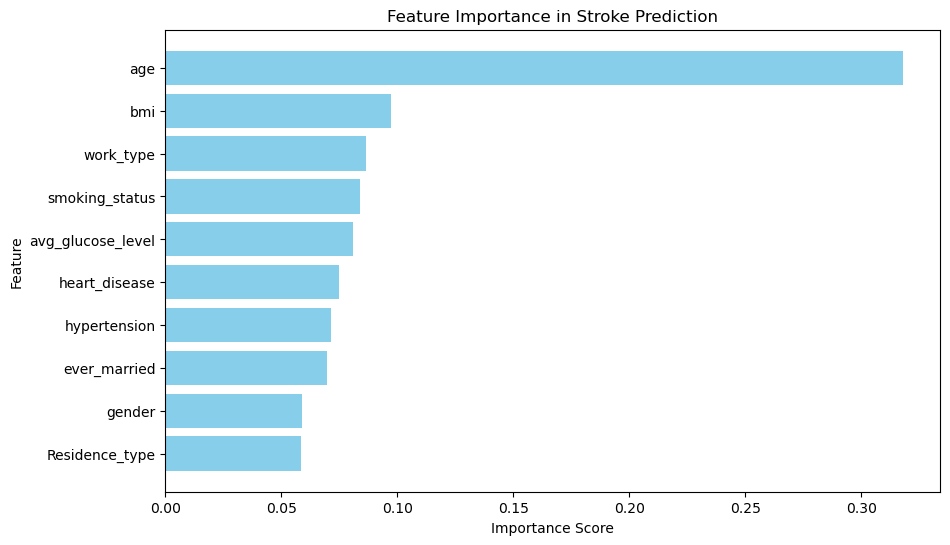

,Feature,Importance
1,age,0.318176
8,bmi,0.097204
5,work_type,0.086335
9,smoking_status,0.084026
7,avg_glucose_level,0.080981
3,heart_disease,0.074893
2,hypertension,0.071535
4,ever_married,0.069677
0,gender,0.058836
6,Residence_type,0.058336


In [13]:
import matplotlib.pyplot as plt
import numpy as np

feature_importances = clf.feature_importances_

feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance in Stroke Prediction')
plt.gca().invert_yaxis()
plt.show()

importance_df


/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


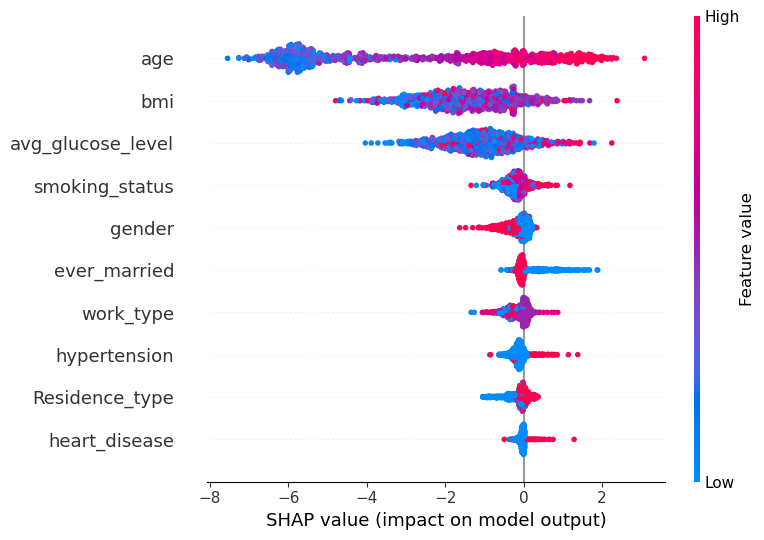

In [14]:
import shap
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)


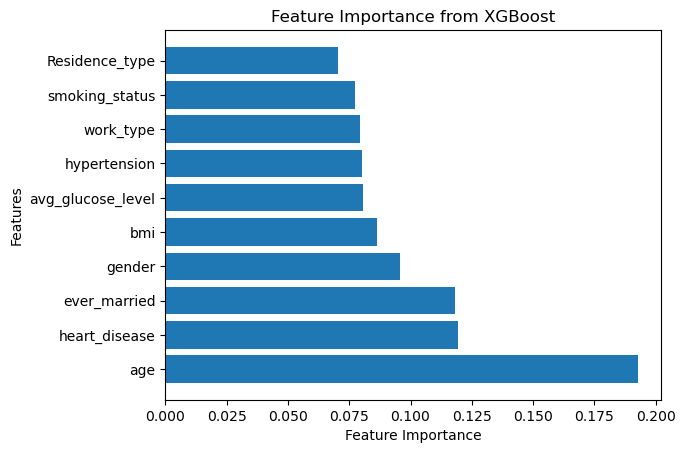

In [15]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Assuming clf is your trained XGBoost model
clf = XGBClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# Get feature importance
importances = clf.feature_importances_

# Sort the importances in descending order
sorted_idx = importances.argsort()[::-1]
sorted_importances = importances[sorted_idx]
sorted_features = X_train.columns[sorted_idx]

# Plot the feature importances
plt.barh(sorted_features, sorted_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance from XGBoost')
plt.show()


In [16]:
!pip install imbalanced-learn

In [17]:
from xgboost import XGBClassifier

scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
print(scale_pos_weight)

# With the availability of "conformal prediction" and advanced ML methods, synthetic oversampling is challenging to justify.
# smote was good
# compare box plot of each variable and stroke for numerical
# clustered bar chart for catergorical and stroke
# Shap?
# Classification: What demographic and health-related factors significantly predict the occurrence of a stroke in patients?
# regularization, cross validation, learning curves

clf = XGBClassifier(max_depth=5, random_state=42, scale_pos_weight=scale_pos_weight)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

precision_0 = precision_score(y_test, y_pred, pos_label=0)
recall_0 = recall_score(y_test, y_pred, pos_label=0)
f1_0 = f1_score(y_test, y_pred, pos_label=0)

precision_1 = precision_score(y_test, y_pred, pos_label=1)
recall_1 = recall_score(y_test, y_pred, pos_label=1)
f1_1 = f1_score(y_test, y_pred, pos_label=1)

print(f"Precision for class 0: {precision_0 * 100:.2f}%")
print(f"Recall for class 0: {recall_0 * 100:.2f}%")
print(f"F1 Score for class 0: {f1_0 * 100:.2f}%")

print(f"Precision for class 1: {precision_1 * 100:.2f}%")
print(f"Recall for class 1: {recall_1 * 100:.2f}%")
print(f"F1 Score for class 1: {f1_1 * 100:.2f}%")

19.542713567839197
Accuracy: 0.923679060665362
Precision for class 0: 96.27%
Recall for class 0: 95.68%
F1 Score for class 0: 95.98%
Precision for class 1: 25.00%
Recall for class 1: 28.00%
F1 Score for class 1: 26.42%


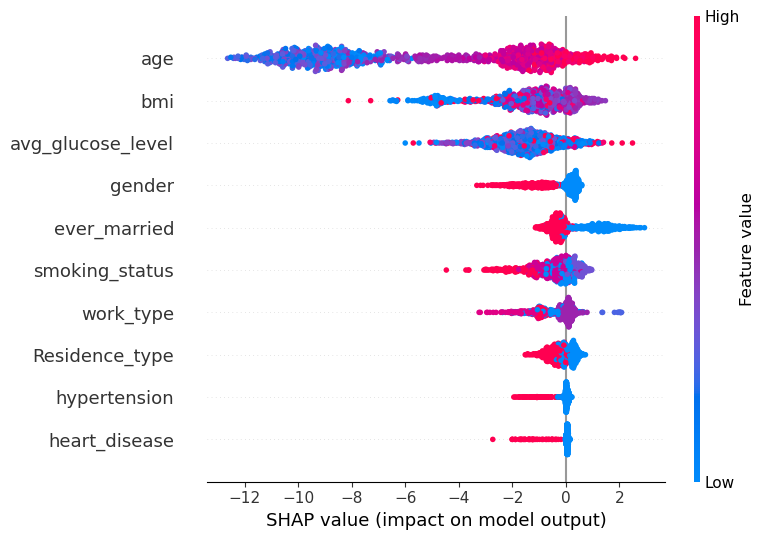

Accuracy: 0.7896281800391389
Precision for class 0: 97.61%
Recall for class 0: 79.84%
F1 Score for class 0: 87.83%
Precision for class 1: 13.66%
Recall for class 1: 62.00%
F1 Score for class 1: 22.38%


In [18]:
import shap
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Apply SMOTE to balance the dataset (only on the training data)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train your XGBClassifier on the resampled data
clf = XGBClassifier(max_depth=5, random_state=42, scale_pos_weight=scale_pos_weight)
clf.fit(X_train_resampled, y_train_resampled)

# Get predicted probabilities for the positive class (class 1) on the test set
y_probs = clf.predict_proba(X_test)[:, 1]

# Set a custom threshold (e.g., 0.3)
threshold = 0.3
y_pred = (y_probs >= threshold).astype(int)

# Create the SHAP explainer for your model
explainer = shap.TreeExplainer(clf)

# Get SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Plot the summary plot of SHAP values (overall feature importance)
shap.summary_plot(shap_values, X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate precision, recall, and F1 score for both classes (0 and 1)
precision_0 = precision_score(y_test, y_pred, pos_label=0)
recall_0 = recall_score(y_test, y_pred, pos_label=0)
f1_0 = f1_score(y_test, y_pred, pos_label=0)

precision_1 = precision_score(y_test, y_pred, pos_label=1)
recall_1 = recall_score(y_test, y_pred, pos_label=1)
f1_1 = f1_score(y_test, y_pred, pos_label=1)

# Print the evaluation metrics for class 0 and class 1
print(f"Precision for class 0: {precision_0 * 100:.2f}%")
print(f"Recall for class 0: {recall_0 * 100:.2f}%")
print(f"F1 Score for class 0: {f1_0 * 100:.2f}%")

print(f"Precision for class 1: {precision_1 * 100:.2f}%")
print(f"Recall for class 1: {recall_1 * 100:.2f}%")
print(f"F1 Score for class 1: {f1_1 * 100:.2f}%")


In [19]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define the hyperparameters to tune
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'n_estimators': [50, 100, 200],
    'scale_pos_weight': [1, 10, 20, 50],  # Tune this parameter to address class imbalance
}

# Initialize GridSearchCV with XGBClassifier
grid_search = GridSearchCV(
    estimator=XGBClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,  # 3-fold cross-validation
    scoring='f1',  # Optimize for F1 score
    n_jobs=-1  # Use all CPU cores for faster computation
)

# Fit the model using the resampled training data (after SMOTE)
grid_search.fit(X_train_resampled, y_train_resampled)

# Output the best hyperparameters and F1 score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best F1 Score: {grid_search.best_score_}")


/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'scale_pos_weight': 1}
Best F1 Score: 0.9489820438627388
